# Visualizing Data for Regression
***

In [1]:
# Load the packages required to run this notebook
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

%matplotlib inline

In [2]:
# Load the datasets
adventure_works = pd.read_csv('../adventure_works.csv', parse_dates = ['BirthDate'])

In [3]:
adventure_works.columns

Index(['CustomerID', 'FirstName', 'LastName', 'AddressLine1', 'City',
       'StateProvinceName', 'CountryRegionName', 'PostalCode', 'PhoneNumber',
       'BirthDate', 'Education', 'Occupation', 'Gender', 'MaritalStatus',
       'HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome',
       'TotalChildren', 'YearlyIncome', 'AveMonthSpend', 'BikeBuyer', 'Age',
       'AgeGroup'],
      dtype='object')

In [4]:
# Drop columns with minimal predictive power and 'BikeBuyer' since we don't have that at the time of evaluation
adventure_works.drop(['CustomerID', 'FirstName', 'LastName', 'AddressLine1', 'PostalCode', 'PhoneNumber',
                      'BirthDate', 'BikeBuyer'], axis=1, inplace=True)

In [5]:
adventure_works.head()

,City,StateProvinceName,CountryRegionName,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,Age,AgeGroup
0,Rockhampton,Queensland,Australia,Bachelors,Professional,M,M,1,0,0,2,137947,89,31,Between 25 and 45 years
1,Seaford,Victoria,Australia,Bachelors,Professional,M,S,0,1,3,3,101141,117,32,Between 25 and 45 years
2,Hobart,Tasmania,Australia,Bachelors,Professional,M,M,1,1,3,3,91945,123,32,Between 25 and 45 years
3,North Ryde,New South Wales,Australia,Bachelors,Professional,F,S,0,1,0,0,86688,50,29,Between 25 and 45 years
4,Wollongong,New South Wales,Australia,Bachelors,Professional,F,S,1,4,5,5,92771,95,29,Between 25 and 45 years


In [6]:
adventure_works.describe()

,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,Age
count,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000
mean,0.674104,1.499756,0.991100,2.004511,78129.672397,72.391002,35.446598
std,0.468723,1.139135,1.514278,1.682318,39728.383493,27.269921,11.241753
min,0.000000,0.000000,0.000000,0.000000,9482.000000,22.000000,17.000000
25%,0.000000,1.000000,0.000000,0.000000,47808.750000,52.000000,27.000000
50%,1.000000,2.000000,0.000000,2.000000,76125.000000,68.000000,34.000000
75%,1.000000,2.000000,2.000000,3.000000,105211.750000,84.000000,43.000000
max,1.000000,4.000000,5.000000,5.000000,196511.000000,176.000000,87.000000


In [7]:
# Print frequency table for list of categorical variables
def count_unique(adventure_works, cols):
    for col in cols:
        print('\n' + 'For column ' + col)
        print(adventure_works[col].value_counts())

cat_cols = ['City', 'StateProvinceName', 'CountryRegionName', 'Education', 'Occupation', 
            'Gender', 'MaritalStatus', 'HomeOwnerFlag', 'AgeGroup']
count_unique(adventure_works, cat_cols)


For column City
London          379
Paris           341
Beaverton       190
Burien          188
Chula Vista     185
               ... 
Clay              1
Baytown           1
Carol Stream      1
Carrollton        1
Branch            1
Name: City, Length: 267, dtype: int64

For column StateProvinceName
California             3948
Washington             2017
England                1709
British Columbia       1388
New South Wales        1376
Oregon                  934
Victoria                801
Queensland              713
Saarland                388
Nordrhein-Westfalen     362
Seine (Paris)           341
Hessen                  334
Hamburg                 268
Seine Saint Denis       255
Nord                    247
South Australia         212
Bayern                  198
Hauts de Seine          168
Yveline                 149
Essonne                 131
Tasmania                 92
Loiret                   52
Seine et Marne           52
Moselle                  49
Brandenburg            

### One dimensional plots

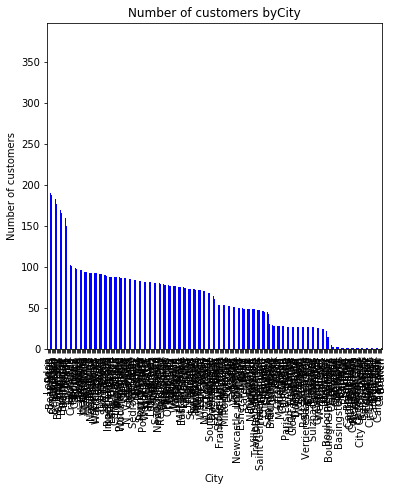

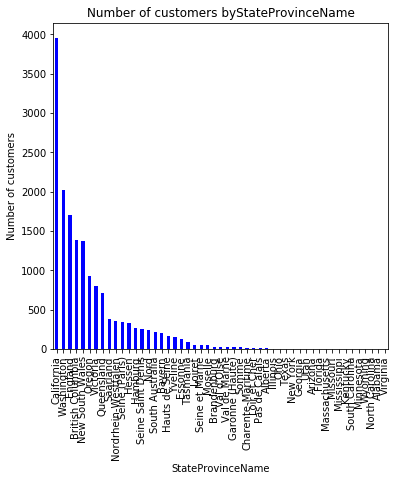

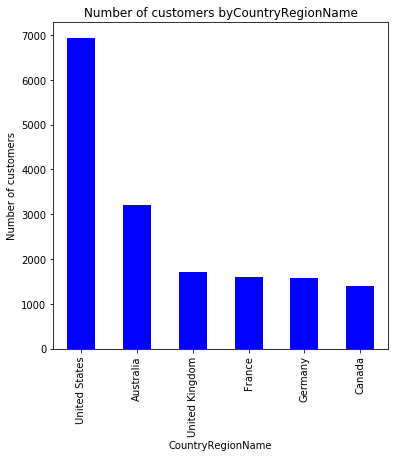

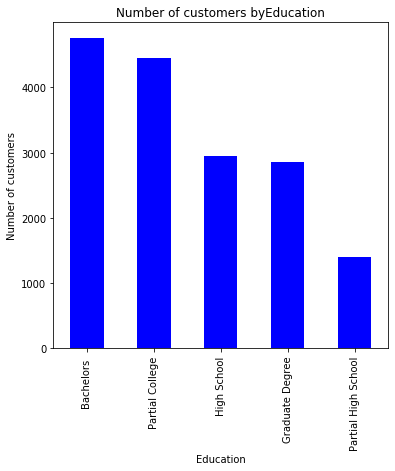

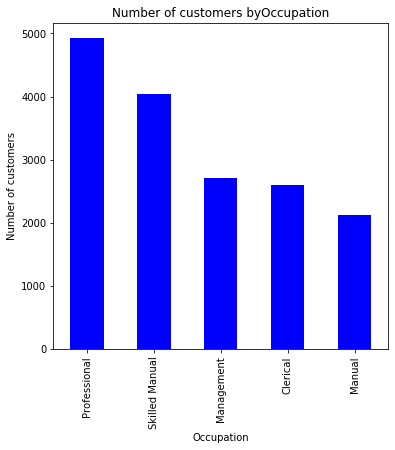

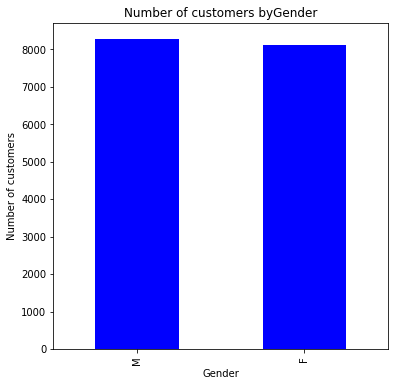

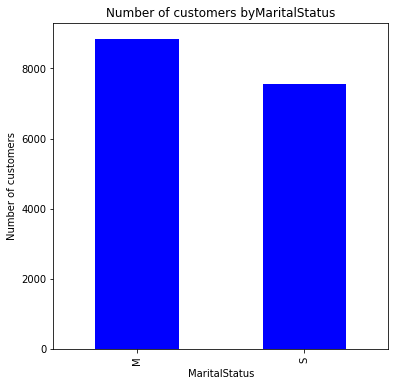

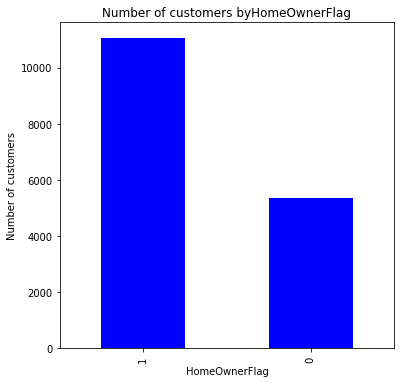

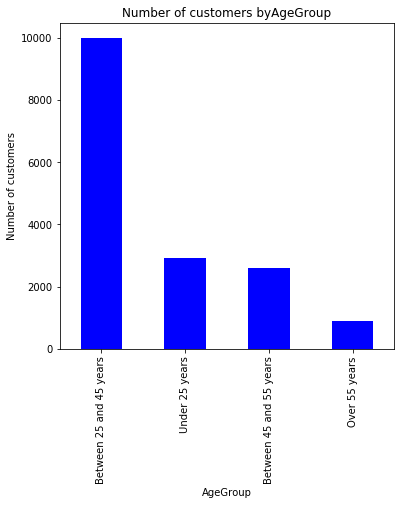

In [8]:
def plot_bars(adventure_works, cols):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        counts = adventure_works[col].value_counts() # find the counts for each unique category
        counts.plot.bar(ax = ax, color = 'blue') # Use the plot.bar method on the counts data frame
        ax.set_title('Number of customers by' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of customers')# Set text for y axis
        plt.show()

plot_bars(adventure_works, cat_cols)    

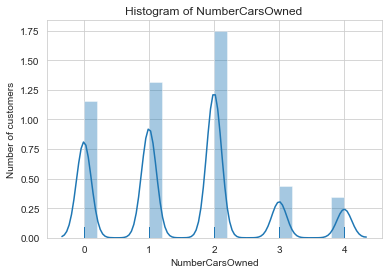

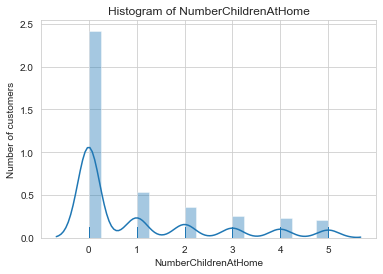

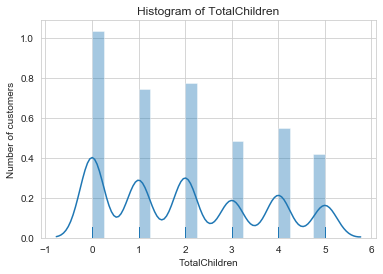

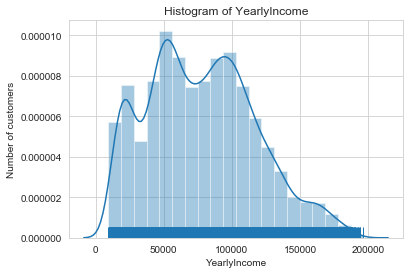

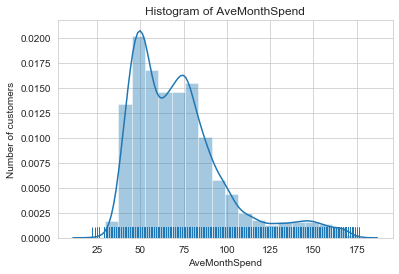

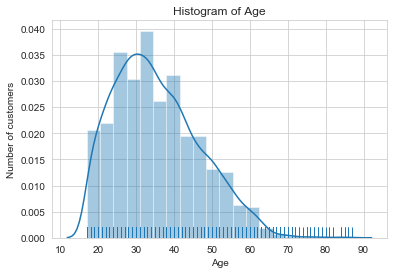

In [9]:
def plot_density_hist(adventure_works, cols, bins = 10, hist = False):
    for col in cols:
        sns.set_style("whitegrid")
        sns.distplot(adventure_works[col], bins = bins, rug=True, hist = hist)
        plt.title('Histogram of ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel('Number of customers')# Set text for y axis
        plt.show()
             
num_cols = ['NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome', 
            'AveMonthSpend', 'Age']
plot_density_hist(adventure_works, num_cols, bins = 20, hist = True)        

### Transforming Numeric Features

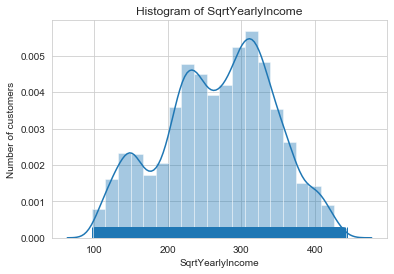

In [10]:
# Apply square root tranformation on YearlyIncome to make it more symmetric
adventure_works['SqrtYearlyIncome'] = np.sqrt(adventure_works['YearlyIncome'])
plot_density_hist(adventure_works, ['SqrtYearlyIncome'],  bins = 20, hist = True)

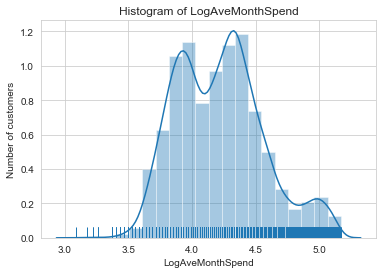

In [11]:
# Apply log tranformation on AveMonthSpend to make it more symmetric
adventure_works['LogAveMonthSpend'] = np.log(adventure_works['AveMonthSpend'])
plot_density_hist(adventure_works, ['LogAveMonthSpend'],  bins = 20, hist = True)

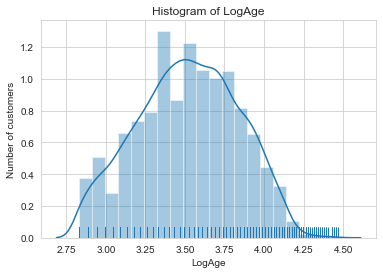

In [12]:
# Apply log tranformation on Age to make it more symmetric
adventure_works['LogAge'] = np.log(adventure_works['Age'])
plot_density_hist(adventure_works, ['LogAge'],  bins = 20, hist = True)

### Two dimensional plots

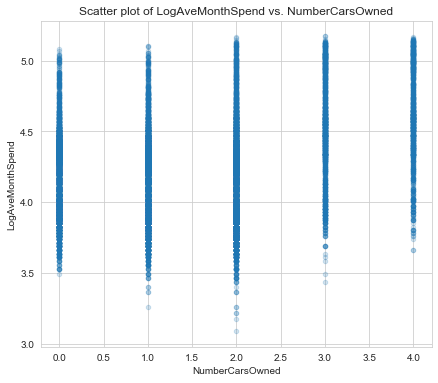

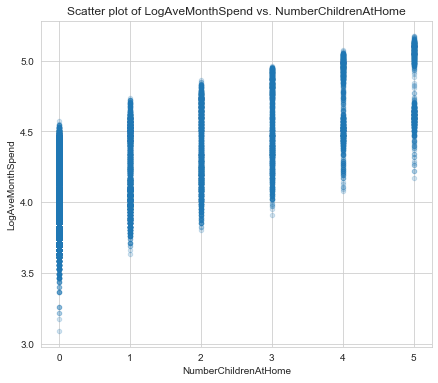

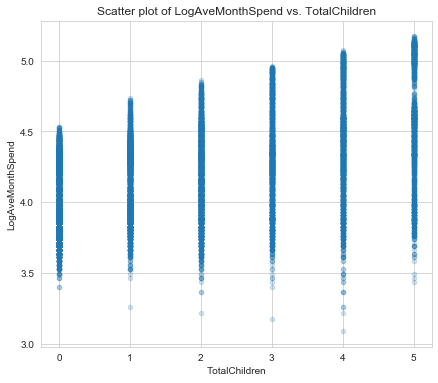

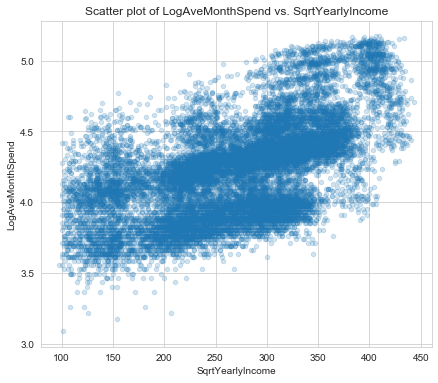

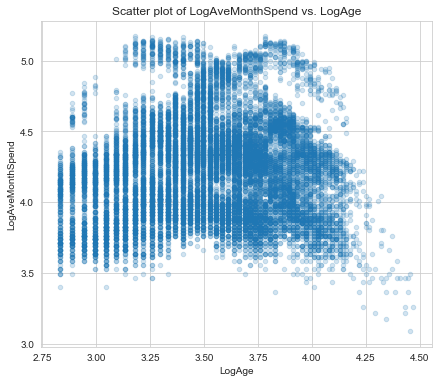

In [13]:
def plot_scatter(adventure_works, cols, col_y = 'LogAveMonthSpend'):
    for col in cols:
        fig = plt.figure(figsize=(7,6)) # define plot area
        ax = fig.gca() # define axis   
        adventure_works.plot.scatter(x = col, y = col_y, ax = ax, alpha = 0.2)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel(col_y
                     )# Set text for y axis
        plt.show()
        
num_cols = ['NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren', 'SqrtYearlyIncome', 'LogAge']
plot_scatter(adventure_works, num_cols)     

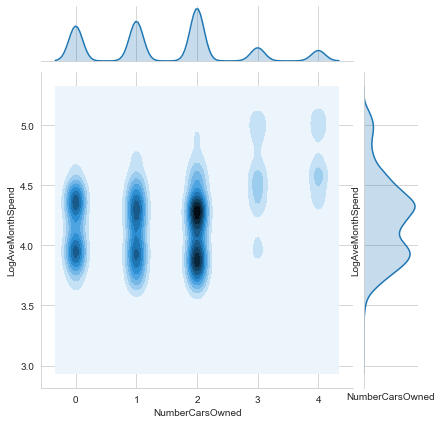

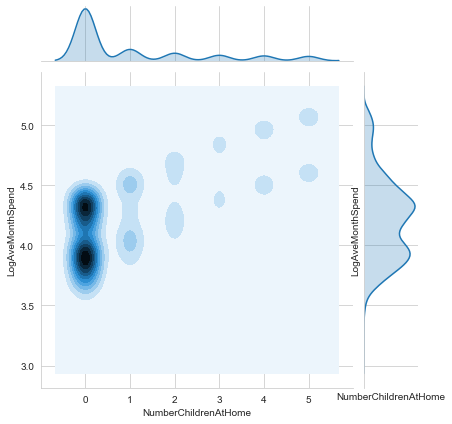

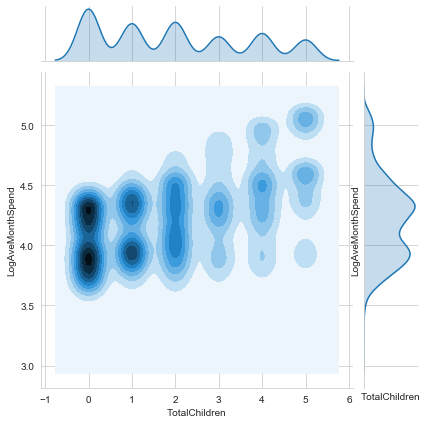

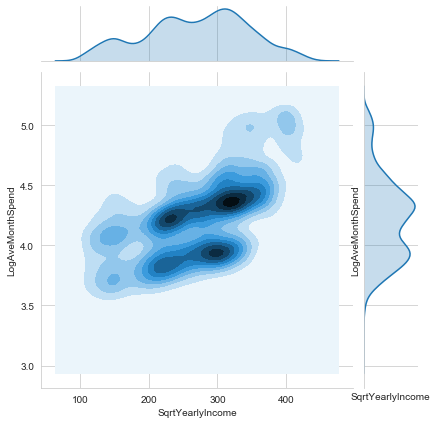

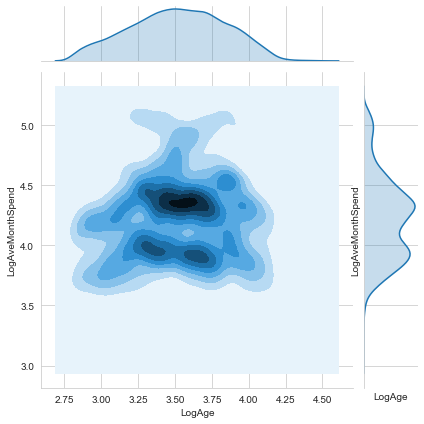

In [14]:
def plot_desity_2d(adventure_works, cols, col_y = 'LogAveMonthSpend', kind ='kde'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.jointplot(col, col_y, data=adventure_works, kind=kind)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()

plot_desity_2d(adventure_works, num_cols)      

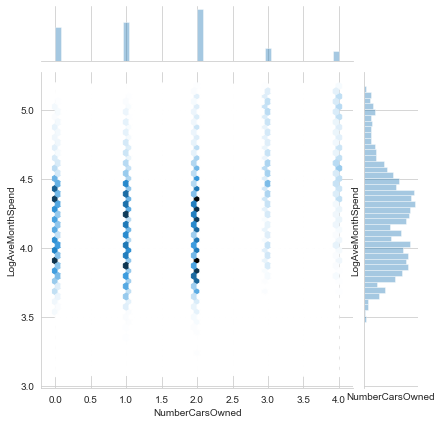

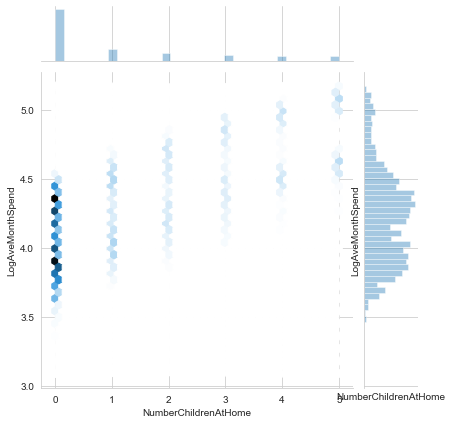

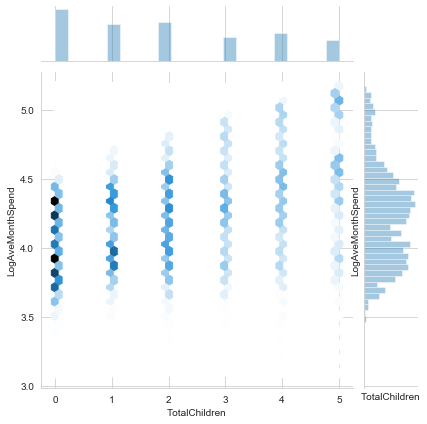

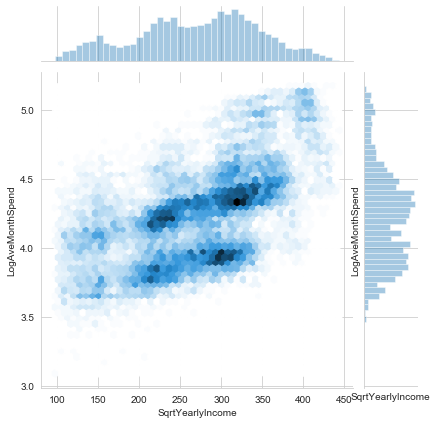

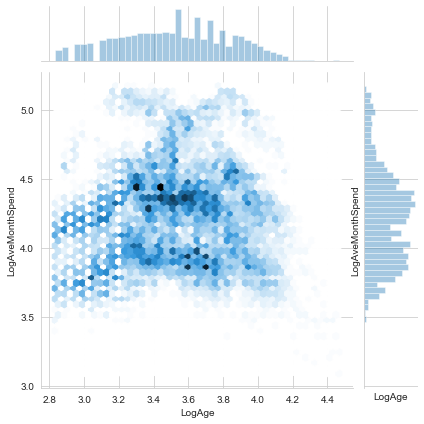

In [15]:
plot_desity_2d(adventure_works, num_cols, kind = 'hex')

### Relation between categorical and numeric features

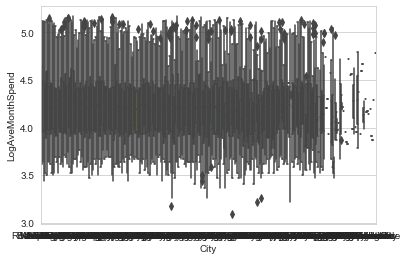

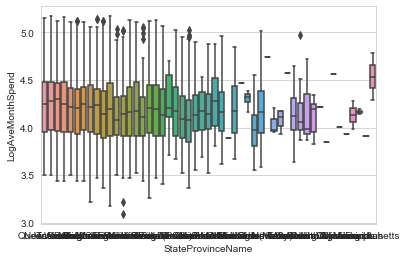

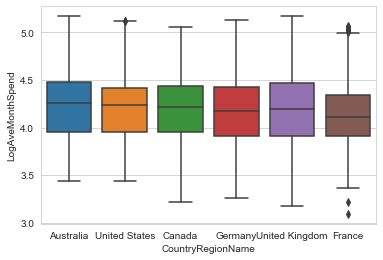

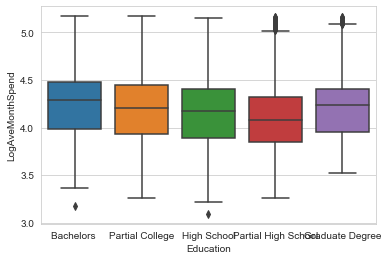

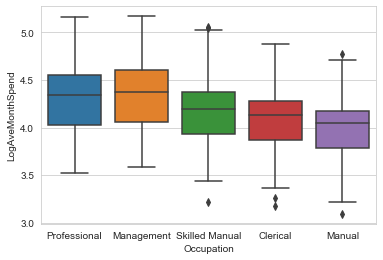

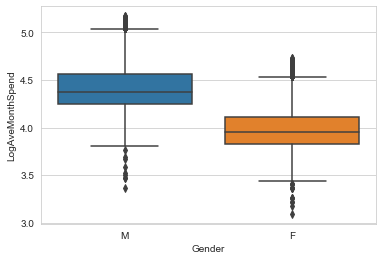

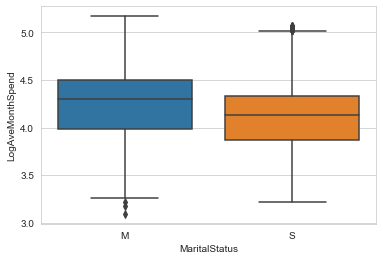

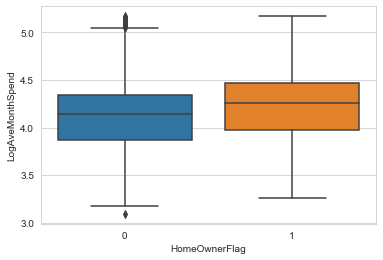

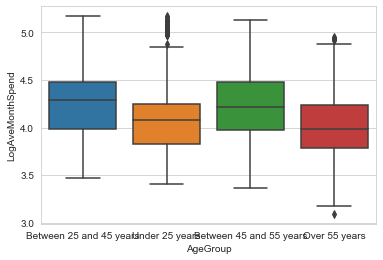

In [16]:
def plot_box(adventure_works, cols, col_y = 'LogAveMonthSpend'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col, col_y, data=adventure_works)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
        
plot_box(adventure_works, cat_cols)    

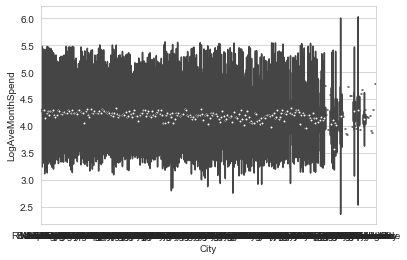

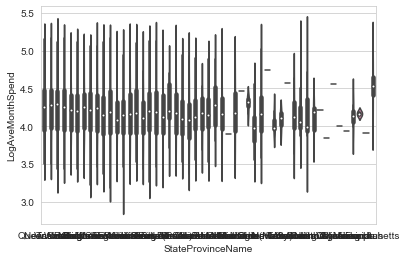

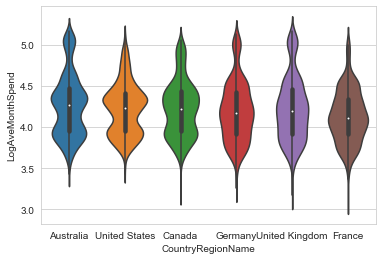

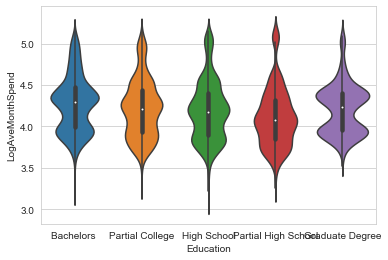

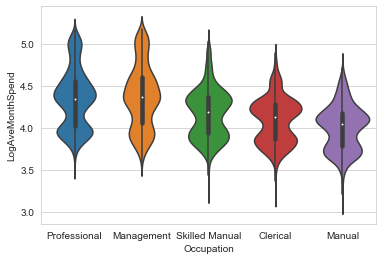

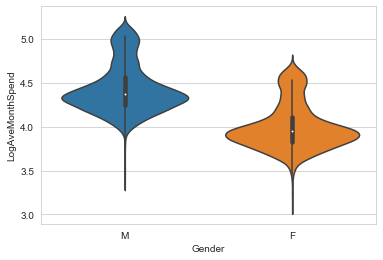

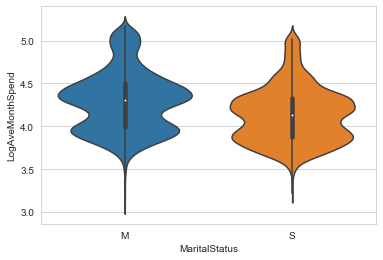

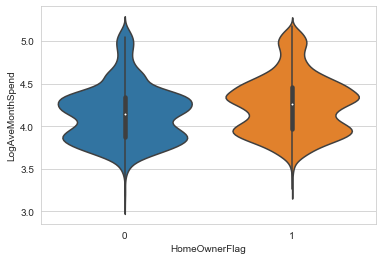

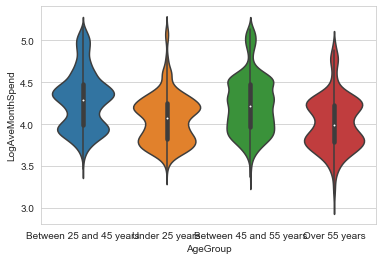

In [17]:
def plot_violin(adventure_works, cols, col_y = 'LogAveMonthSpend'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(col, col_y, data=adventure_works)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
        
plot_violin(adventure_works, cat_cols)    